# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


In [3]:
# counting unique values in the cities list
city_set = set(cities)
n = len(city_set)
print(f"Number of unique cities in the list is {n}")

Number of unique cities in the list is 586


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
city_not_found = 0

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']      #dt Time of data calculation, unix, UTC
        #print(f"Weather: {city_lat} {city_lng} {city_max_temp} {city_humidity} {city_clouds} {city_wind} {city_country} {city_date}")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        city_not_found += 1
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"City was not found {city_not_found} times")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susanville
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | northam
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | nar'yan-mar
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | canchungo
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | nova vicosa
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | wailua homesteads
Processing R

Processing Record 41 of Set 4 | kailua-kona
Processing Record 42 of Set 4 | burao
Processing Record 43 of Set 4 | yurgamysh
Processing Record 44 of Set 4 | tucuma
Processing Record 45 of Set 4 | flying fish cove
Processing Record 46 of Set 4 | alaghsas
Processing Record 47 of Set 4 | guarapari
Processing Record 48 of Set 4 | tashtyp
Processing Record 49 of Set 4 | ribeira grande
Processing Record 0 of Set 5 | mount gambier
Processing Record 1 of Set 5 | frederico westphalen
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | port douglas
Processing Record 4 of Set 5 | mufulira
Processing Record 5 of Set 5 | selkirk
Processing Record 6 of Set 5 | yeniseysk
Processing Record 7 of Set 5 | raton
Processing Record 8 of Set 5 | antonio enes
Processing Record 9 of Set 5 | siteki
Processing Record 10 of Set 5 | isyangulovo
Processing Record 11 of Set 5 | san ignacio de velasco
Processing Record 12 of Set 5 | zhanaozen
Processing Record 13 of Set 5 | pimentel
Processing Record 

Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | fisterra
Processing Record 36 of Set 8 | arraial do cabo
Processing Record 37 of Set 8 | tadine
Processing Record 38 of Set 8 | san luis de la loma
Processing Record 39 of Set 8 | tofol
Processing Record 40 of Set 8 | plymouth
Processing Record 41 of Set 8 | mata-utu
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | urganch
Processing Record 44 of Set 8 | payande
City not found. Skipping...
Processing Record 45 of Set 8 | kalevala
Processing Record 46 of Set 8 | ambagarh chauki
Processing Record 47 of Set 8 | alotau
City not found. Skipping...
Processing Record 48 of Set 8 | puerto baquerizo moreno
Processing Record 49 of Set 8 | ambon
Processing Record 0 of Set 9 | yagry
City not found. Skipping...
Processing Record 1 of Set 9 | boende
Processing Record 2 of Set 9 | devinuwara
City not found. Skipping...
Processing Record 3 of Set 9 | petropavlovsk-kamchatsky
Processing Record 4 of Set 9 | m

Processing Record 21 of Set 12 | elmendorf air force base
City not found. Skipping...
Processing Record 22 of Set 12 | odacho-oda
Processing Record 23 of Set 12 | firuzabad
Processing Record 24 of Set 12 | carboneras
Processing Record 25 of Set 12 | galveston
Processing Record 26 of Set 12 | baise city
Processing Record 27 of Set 12 | madimba
Processing Record 28 of Set 12 | happy valley-goose bay
Processing Record 29 of Set 12 | kiunga
Processing Record 30 of Set 12 | krasnokamensk
Processing Record 31 of Set 12 | bengkulu
Processing Record 32 of Set 12 | greenwood
Processing Record 33 of Set 12 | ierapetra
Processing Record 34 of Set 12 | buka
Processing Record 35 of Set 12 | la'ie
-----------------------------
Data Retrieval Complete      
-----------------------------
City was not found 31 times


### Debug: City information for a single city

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Create endpoint URL with each city
city_url =  f"{url}appid={weather_api_key}&units=metric&q={cities[1]}"
# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()
pprint(city_weather) 
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']      #dt Time of data calculation, unix, UTC
print(f"Weather: {city_lat} {city_lng} {city_max_temp} {city_humidity} {city_clouds} {city_wind} {city_country} {city_date}")

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Check: the lenth of city_data_df should = lenth of [City]
num_city_found = len(cities)-city_not_found
print(f"Number of cities found is {num_city_found}")

# Show Record Count
city_data_df.count()

Number of cities found is 555


City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susanville,40.4163,-120.6530,18.23,28,0,1.54,US,1698883870
1,grytviken,-54.2811,-36.5092,-0.62,76,10,4.01,GS,1698883159
2,hami,42.8000,93.4500,5.79,45,3,3.27,CN,1698883630
3,waitangi,-43.9535,-176.5597,14.34,97,100,4.47,NZ,1698883338
4,margaret river,-33.9500,115.0667,16.22,68,60,5.67,AU,1698883343


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susanville,40.4163,-120.6530,18.23,28,0,1.54,US,1698883870
1,grytviken,-54.2811,-36.5092,-0.62,76,10,4.01,GS,1698883159
2,hami,42.8000,93.4500,5.79,45,3,3.27,CN,1698883630
3,waitangi,-43.9535,-176.5597,14.34,97,100,4.47,NZ,1698883338
4,margaret river,-33.9500,115.0667,16.22,68,60,5.67,AU,1698883343


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

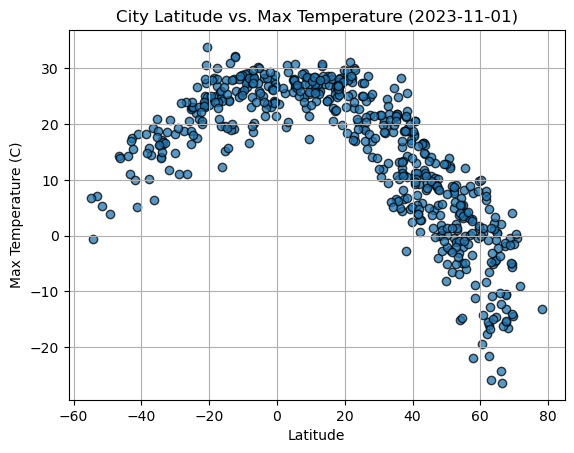

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black", alpha=0.75) #marker="o", facecolors="red",

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

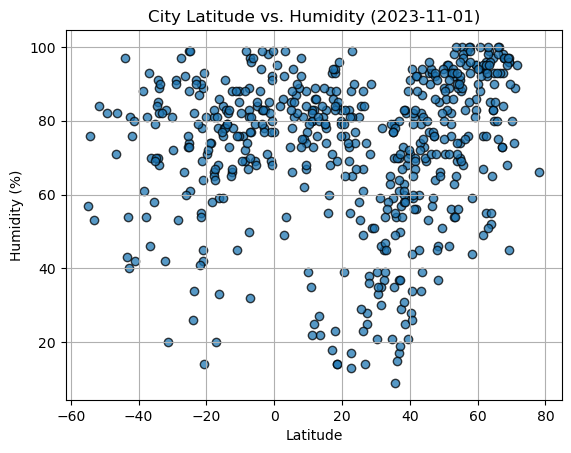

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black", alpha=0.75) #marker="o", facecolors="red",

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

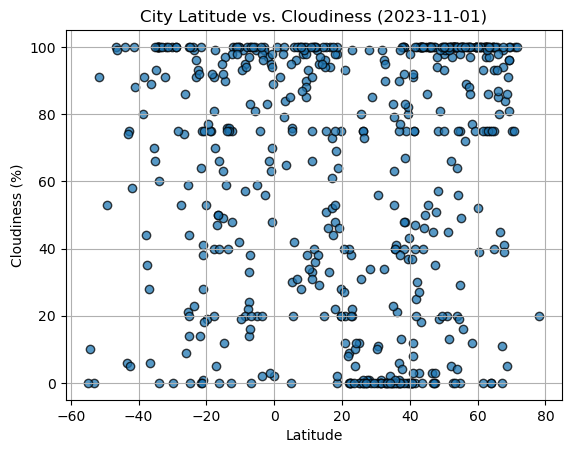

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75) #marker="o", facecolors="red",


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

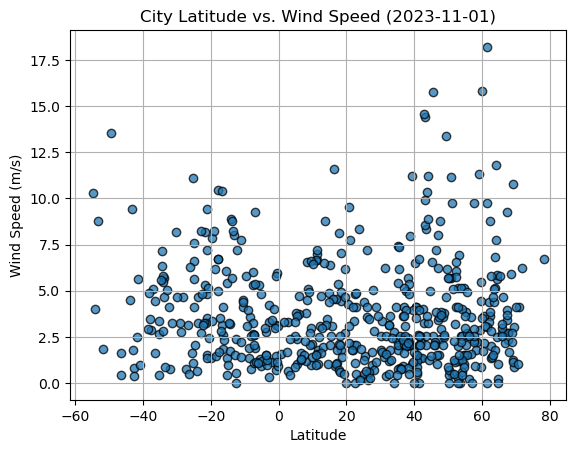

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.75) #marker="o", facecolors="red",

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def LinearRegressionPlot(df_x_clm, df_y_clm, line_eq_coor, x_lbl, y_lbl):
    # Add the linear regression equation and line to plot
    x_values = df_x_clm
    y_values = df_y_clm
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.annotate(line_eq,line_eq_coor, fontsize=15,color="red")
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    print(f"The r-value is: {rvalue}")
    plt.show()
    # data_df.columns

The r-value is: -0.6569739399222153


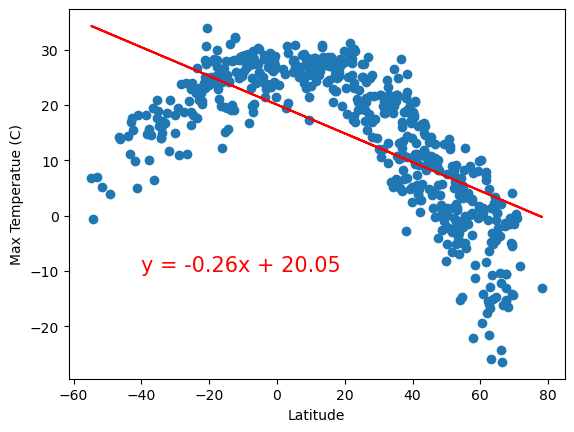

In [21]:
# Test function
LinearRegressionPlot(city_data_df['Lat'], city_data_df['Max Temp'], (-40,-10), 'Latitude', 'Max Temperatue (C)')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susanville,40.4163,-120.6530,18.23,28,0,1.54,US,1698883870
2,hami,42.8000,93.4500,5.79,45,3,3.27,CN,1698883630
5,northam,51.0333,-4.2167,12.59,95,99,9.77,GB,1698883427
7,nar'yan-mar,67.6713,53.0870,-10.50,97,41,2.68,RU,1698883476
10,ilulissat,69.2167,-51.1000,4.01,45,81,10.80,GL,1698883359


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-0.62,76,10,4.01,GS,1698883159
3,waitangi,-43.9535,-176.5597,14.34,97,100,4.47,NZ,1698883338
4,margaret river,-33.9500,115.0667,16.22,68,60,5.67,AU,1698883343
6,alice springs,-23.7000,133.8833,26.75,34,99,4.63,AU,1698883195
8,new norfolk,-42.7826,147.0587,17.62,40,75,0.80,AU,1698883367


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8760544911598045


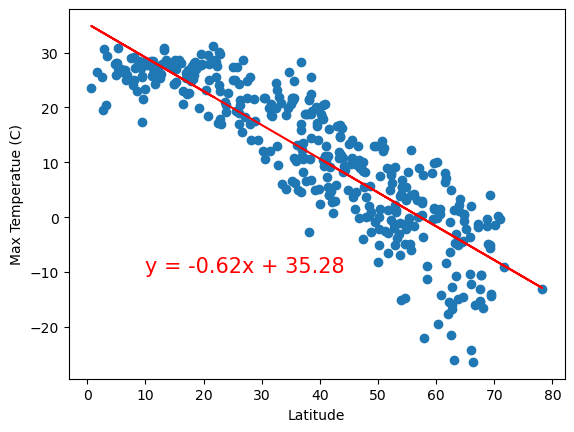

In [17]:
# Linear regression on Northern Hemisphere
LinearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10,-10), 'Latitude', 'Max Temperatue (C)')

The r-value is: 0.7621592820384663


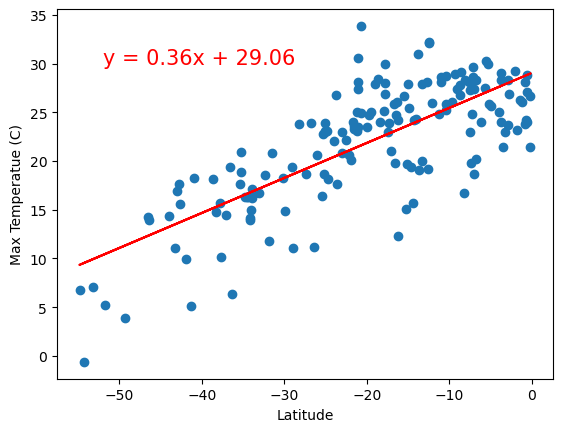

In [19]:
# Linear regression on Southern Hemisphere
LinearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-52,30), 'Latitude', 'Max Temperatue (C)')

**Discussion about the linear relationship:** As expected the closer to the equator the wormer the temperatures
    in both Southern and Northern Hemisphere. This relationships are well modeled by a liner regration 
    because r-values are close to 1 for both plots. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24176250917107012


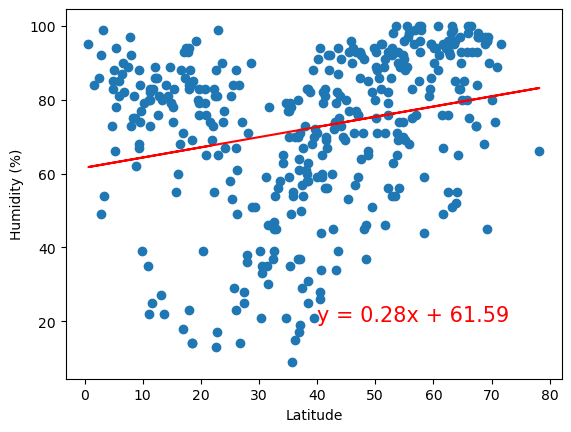

In [22]:
# Northern Hemisphere
LinearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (40, 20), 'Latitude', 'Humidity (%)')

The r-value is: 0.19858886330152078


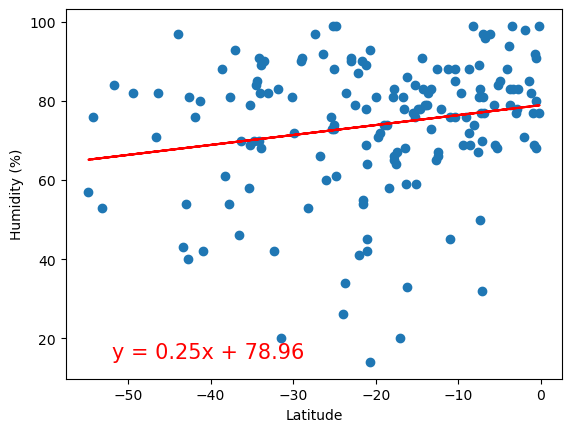

In [23]:
# Southern Hemisphere
LinearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-52,15), 'Latitude', 'Humidity (%)')

In [27]:
**Discussion about the linear relationship:** Humidy vs Latitute plots does not indicate liner relationships as 
    we get closer to the equtor as shown by the scater plot and r-value aproximatly 0.2. 

SyntaxError: invalid syntax (308782217.py, line 1)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17555990423842618


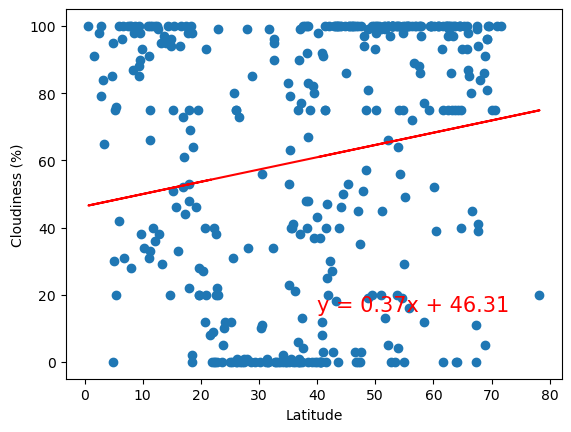

In [24]:
# Northern Hemisphere
LinearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (40, 15), 'Latitude', 'Cloudiness (%)')

The r-value is: 0.04051109003801724


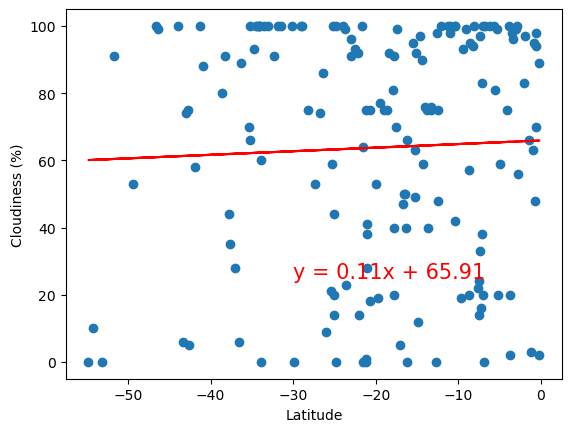

In [25]:
# Southern Hemisphere
LinearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-30,25), 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** Claudiness vs Latitute plots does not indicate liner relationships as 
    we get closer to the equtor as shown by the scater plot and r-value aproximatly 0.2. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11167985667005349


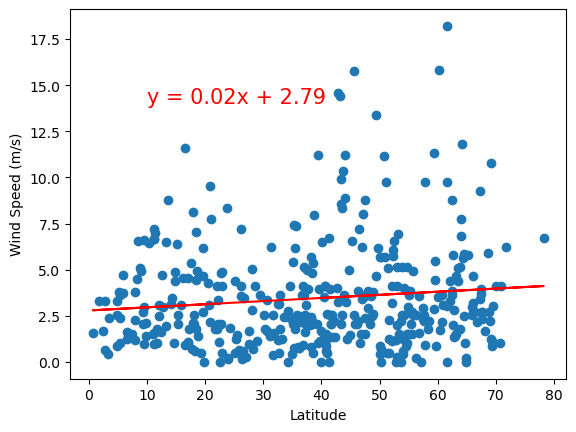

In [31]:
# Northern Hemisphere
LinearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (10,14), 'Latitude', 'Wind Speed (m/s)')

The r-value is: -0.19211186820748202


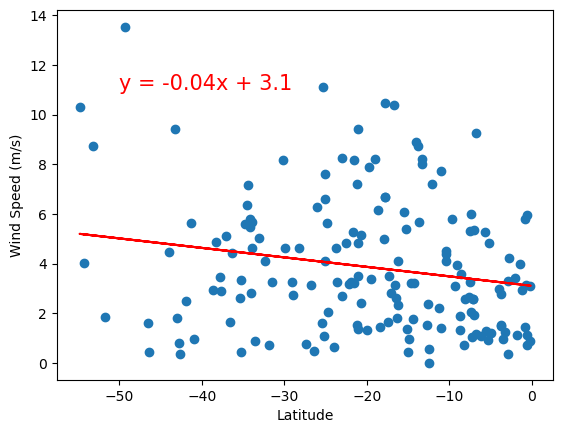

In [32]:
# Southern Hemisphere
LinearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-50,11), 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** Wind Speed vs Latitute plots does not indicate liner relationships as 
    we get closer to the equtor as shown by the scater plot and r-value aproximatly 0.2. 